<a href="https://colab.research.google.com/github/palashpanchal/MiniProject_PestDetection/blob/main/neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn import *
import tensorflow as tf
from tensorflow import keras


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.legacy import RMSprop as LegacyRMSprop

In [11]:
img = image.load_img("/content/drive/MyDrive/miniproject_may/basedata/train/pest/BA (1).jpg")

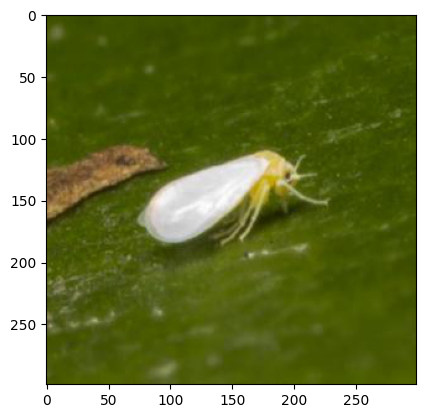

In [12]:
plt.imshow(img)

In [21]:

cv2.imread("/content/drive/MyDrive/miniproject_may/basedata/train/pest/BA (12).jpg").shape

(299, 299, 3)

In [22]:
#generating training and testing dataset
train = ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [25]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/miniproject_may/basedata/train/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/miniproject_may/basedata/validation/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 34 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [24]:
train_dataset.class_indices

{'nopest': 0, 'pest': 1}

In [26]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
#Creating a CNN with maxpooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
     tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
     tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    ##
    tf.keras.layers.Flatten(),
    ##
    tf.keras.layers.Dense(512,activation='relu'),
    ##
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer=LegacyRMSprop(lr=0.001),
              metrics=['accuracy'])


# legacy_opt = LegacyRMSprop(lr=0.001)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [34]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs=10,
                      validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 5s 877ms/step - loss: 3.7001 - accuracy: 0.2222
Epoch 2/10
3/3 [==============================] - 2s 718ms/step - loss: 0.7549 - accuracy: 0.7143
Epoch 3/10
3/3 [==============================] - 1s 334ms/step - loss: 0.8840 - accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 1s 284ms/step - loss: 0.6947 - accuracy: 0.7778
Epoch 5/10
3/3 [==============================] - 1s 266ms/step - loss: 0.7170 - accuracy: 0.5556
Epoch 6/10
3/3 [==============================] - 1s 186ms/step - loss: 1.0108 - accuracy: 0.7778
Epoch 7/10
3/3 [==============================] - 1s 171ms/step - loss: 0.6915 - accuracy: 0.7778
Epoch 8/10
3/3 [==============================] - 1s 391ms/step - loss: 0.5809 - accuracy: 0.8571
Epoch 9/10
3/3 [==============================] - 1s 258ms/step - loss: 0.7366 - accuracy: 0.6667
Epoch 10/10
3/3 [==============================] - 1s 173ms/step - loss: 0.4943 - accuracy: 1.0000


In [35]:
dir_path='/content/drive/MyDrive/miniproject_may/basedata/test'

In [ ]:
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+' //'+i)
  plt.imshow(img)

In [36]:
import glob

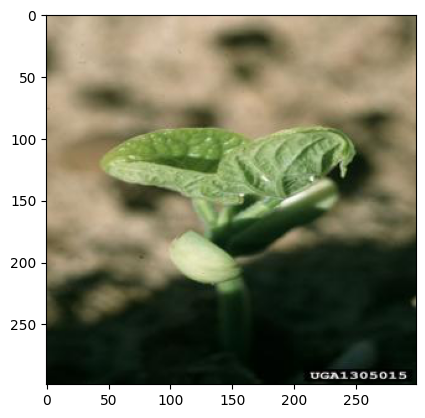

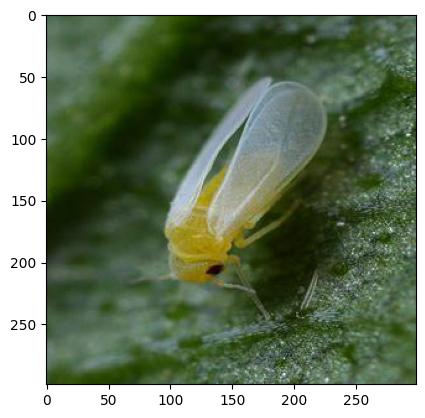

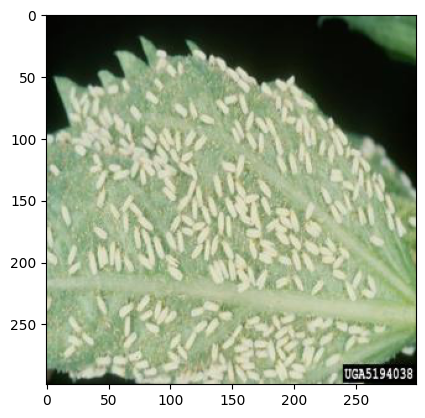

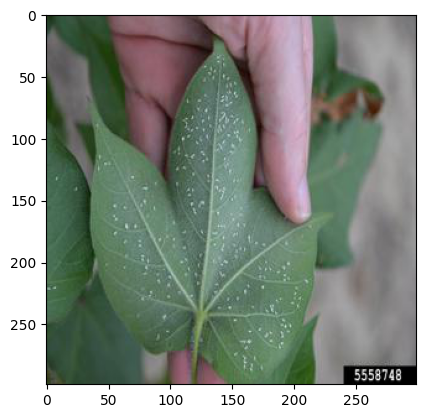

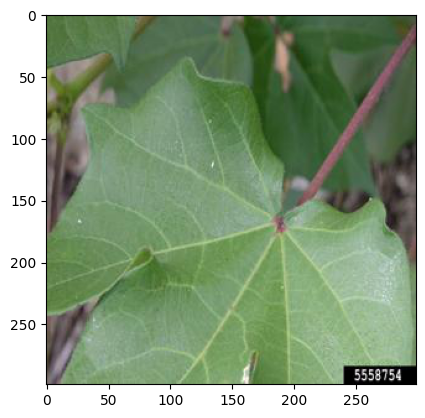

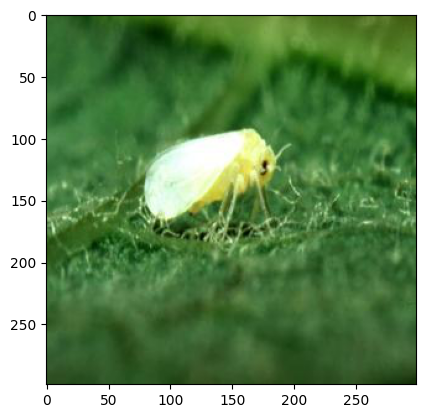

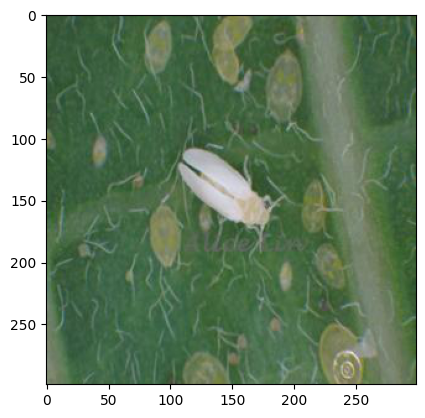

In [37]:
dir_path = '/content/drive/MyDrive/miniproject_may/basedata/test'
image_paths = sorted(glob.glob(os.path.join(dir_path, '*.jpg')))  # get the paths of all JPG images

for img_path in image_paths:
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.show()